<a href="https://colab.research.google.com/github/Supotunji/Supotunji/blob/main/Data_Mining_taxhomelessness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload tax payments after cleaning in excel
taxdata = pd.read_csv('/content/drive/MyDrive/corr TaxTable_3.13_2021.csv')
taxdata

,Region / County codes,Region/County,Self-employment income: Number of individuals,Self-employment income: Mean,Self-employment income: Median,Employment income: Number of individuals,Employment income: Mean,Employment income: Median,Pension income: Number of individuals,Pension income: Mean,...,"Property, interest, dividend and other income: Number of individuals","Property, interest, dividend and other income: Mean","Property, interest, dividend and other income: Median",Total income: Number of individuals 2021,Total income: Mean 2021,Total income: Median 2021,Total tax: Number of individuals 2021,Total tax: Mean 2021,Total tax: Median 2021,Total tax: Amount 2021
0,K02000001,United Kingdom,"3,280","29,500","16,400","23,900","34,600","25,300","8,320","19,600",...,"13,900","6,640",113,"31,700","37,300","26,300","31,700","6,180","2,470","196,000"
1,E92000001,England,"2,830","30,300","16,600","20,200","35,400","25,500","6,860","19,700",...,"11,800","7,020",125,"26,600","38,200","26,600","26,600","6,500","2,520","173,000"
2,E12000001,North East,85,"22,400","16,000",886,"29,100","23,900",349,"18,000",...,505,"3,750",59,"1,170","30,600","24,300","1,170","3,870","2,120","4,530"
3,E11000007,Tyne & Wear,31,"22,700","16,200",371,"29,300","24,300",128,"17,300",...,203,"3,620",49,474,"30,600","24,500",474,"3,870","2,150","1,840"
4,Not applicable,Unitary Authorities (North East),54,"22,200","15,900",515,"28,900","23,600",221,"18,400",...,302,"3,840",66,698,"30,500","24,200",698,"3,870","2,100","2,700"
5,E12000002,North West,282,"22,800","15,800","2,560","30,500","24,200",901,"18,700",...,"1,380","5,470",84,"3,340","32,600","25,000","3,340","4,550","2,250","15,200"
6,E10000006,Cumbria,25,"20,900","15,700",170,"29,600","24,300",89,"18,700",...,110,"5,060",157,246,"31,700","25,300",246,"4,030","2,280",989
7,E11000001,Greater Manchester,103,"23,400","16,100",982,"30,100","24,100",277,"18,000",...,477,"5,350",71,"1,230","32,100","24,900","1,230","4,370","2,230","5,380"
8,E10000017,Lancashire,51,"21,900","15,500",419,"29,500","24,000",174,"19,100",...,263,"5,660",103,574,"31,900","24,900",574,"4,210","2,210","2,410"
9,E11000002,Merseyside,46,"22,000","15,500",478,"29,500","24,100",166,"18,000",...,232,"4,280",58,613,"31,100","24,600",613,"4,060","2,180","2,490"


In [ ]:
print(taxdata.columns)

Index(['Region / County codes', 'Region/County ',
       'Self-employment income: Number of individuals',
       'Self-employment income: Mean', 'Self-employment income: Median',
       'Employment income: Number of individuals', 'Employment income: Mean',
       'Employment income: Median', 'Pension income: Number of individuals',
       'Pension income: Mean', 'Pension income: Median',
       'Property, interest, dividend and other income: Number of individuals',
       'Property, interest, dividend and other income: Mean',
       'Property, interest, dividend and other income: Median',
       'Total income: Number of individuals 2021', 'Total income: Mean 2021',
       'Total income: Median 2021', 'Total tax: Number of individuals 2021',
       'Total tax: Mean 2021', 'Total tax: Median 2021',
       'Total tax: Amount 2021'],
      dtype='object')


In [ ]:
taxdata = taxdata[~taxdata['Region/County '].isin(['United Kingdom', 'England', 'Northern Ireland', 'Scotland', 'Wales'])]

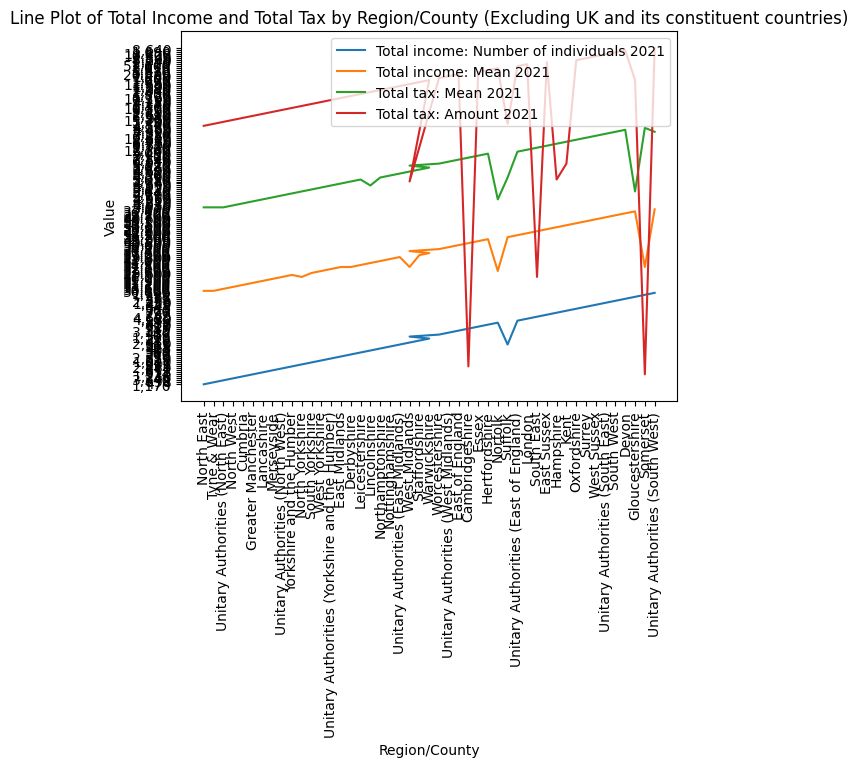

In [ ]:
# Filter the data for the required columns and drop rows for UK and its constituent countries
taxdata_filtered = taxdata[(taxdata['Region/County '] != 'United Kingdom') & (taxdata['Region/County '] != 'England') & (taxdata['Region/County '] != 'Northern Ireland') & (taxdata['Region/County '] != 'Scotland') & (taxdata['Region/County '] != 'Wales')]

# Create a line plot
plt.plot(taxdata_filtered['Region/County '], taxdata_filtered['Total income: Number of individuals 2021'], label='Total income: Number of individuals 2021')
plt.plot(taxdata_filtered['Region/County '], taxdata_filtered['Total income: Mean 2021'], label='Total income: Mean 2021')
plt.plot(taxdata_filtered['Region/County '], taxdata_filtered['Total tax: Mean 2021'], label='Total tax: Mean 2021')
plt.plot(taxdata_filtered['Region/County '], taxdata_filtered['Total tax: Amount 2021'], label='Total tax: Amount 2021')

# Add labels and title
plt.xlabel('Region/County')
plt.ylabel('Value')
plt.title('Line Plot of Total Income and Total Tax by Region/County (Excluding UK and its constituent countries)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.show()


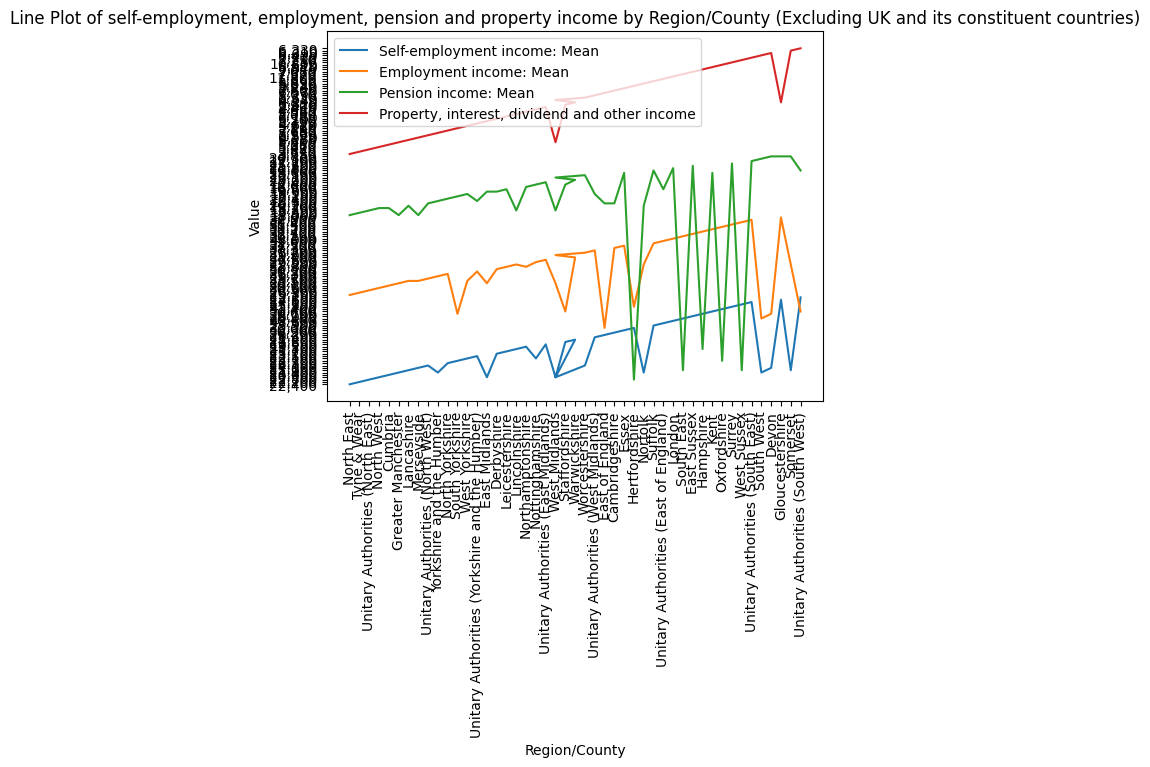

In [ ]:
# Filter the data for the required columns and drop rows for UK and its constituent countries
taxdata_filtered = taxdata[(taxdata['Region/County '] != 'United Kingdom') & (taxdata['Region/County '] != 'England') & (taxdata['Region/County '] != 'Northern Ireland') & (taxdata['Region/County '] != 'Scotland') & (taxdata['Region/County '] != 'Wales')]

# Create a line plot
plt.plot(taxdata_filtered['Region/County '], taxdata_filtered['Self-employment income: Mean'], label='Self-employment income: Mean')
plt.plot(taxdata_filtered['Region/County '], taxdata_filtered['Employment income: Mean'], label='Employment income: Mean')
plt.plot(taxdata_filtered['Region/County '], taxdata_filtered['Pension income: Mean'], label='Pension income: Mean')
plt.plot(taxdata_filtered['Region/County '], taxdata_filtered['Property, interest, dividend and other income: Mean'], label='Property, interest, dividend and other income')

# Add labels and title
plt.xlabel('Region/County')
plt.ylabel('Value')
plt.title('Line Plot of self-employment, employment, pension and property income by Region/County (Excluding UK and its constituent countries)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
taxd = taxdata.copy()

In [ ]:
# check for NaN values
taxdata_nan = taxdata.isna().sum()
nrows = taxdata_nan.shape[0]
percentagedata_nan = taxdata_nan*100/nrows
print(percentagedata_nan)

Region / County codes                                                   0.0
Region/County                                                           0.0
Self-employment income: Number of individuals                           0.0
Self-employment income: Mean                                            0.0
Self-employment income: Median                                          0.0
Employment income: Number of individuals                                0.0
Employment income: Mean                                                 0.0
Employment income: Median                                               0.0
Pension income: Number of individuals                                   0.0
Pension income: Mean                                                    0.0
Pension income: Median                                                  0.0
Property, interest, dividend and other income: Number of individuals    0.0
Property, interest, dividend and other income: Mean                     0.0
Property, in

In [ ]:
cols_to_convert = ['Self-employment income: Number of individuals', 'Self-employment income: Mean',
           'Self-employment income: Median', 'Employment income: Number of individuals',
           'Employment income: Mean', 'Employment income: Median', 'Pension income: Number of individuals',
           'Pension income: Mean', 'Pension income: Median',
           'Property, interest, dividend and other income: Number of individuals',
           'Property, interest, dividend and other income: Mean', 'Total income: Number of individuals 2021',
           'Total income: Mean 2021', 'Total income: Median 2021', 'Total tax: Number of individuals 2021',
           'Total tax: Mean 2021', 'Total tax: Median 2021', 'Total tax: Amount 2021']

# remove commas from the specified columns
for col in cols_to_convert:
    taxd[cols_to_convert] = taxd[cols_to_convert].replace(',', '', regex=True)

# convert the specified columns to int64
taxd[cols_to_convert] = taxd[cols_to_convert].astype('int64')

# print the updated DataFrame
print(taxd)


   Region / County codes                                  Region/County   \
2              E12000001                                      North East   
3              E11000007                                     Tyne & Wear   
4         Not applicable                Unitary Authorities (North East)   
5              E12000002                                      North West   
6              E10000006                                         Cumbria   
7              E11000001                              Greater Manchester   
8              E10000017                                      Lancashire   
9              E11000002                                      Merseyside   
10        Not applicable                Unitary Authorities (North West)   
11             E12000003                        Yorkshire and the Humber   
12             E10000023                                 North Yorkshire   
13             E11000003                                 South Yorkshire   
14          

In [ ]:
taxd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 49
Data columns (total 21 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Region / County codes                                                 48 non-null     object
 1   Region/County                                                         48 non-null     object
 2   Self-employment income: Number of individuals                         48 non-null     int64 
 3   Self-employment income: Mean                                          48 non-null     int64 
 4   Self-employment income: Median                                        48 non-null     int64 
 5   Employment income: Number of individuals                              48 non-null     int64 
 6   Employment income: Mean                                               48 non-null     int64 
 7   Employment

In [ ]:
# check for duplicate rows
duplicated_counts = taxdata.duplicated().sum()
print(duplicated_counts)

0


In [ ]:
# checking amount of duplicate values
print('Number of entries before removing duplicates:', taxdata.shape[0])
columns = taxdata.columns[1:]
nrows = taxdata.shape[0]
print('Number of entries after removing duplicates:', nrows)

Number of entries before removing duplicates: 48
Number of entries after removing duplicates: 48


<Axes: >

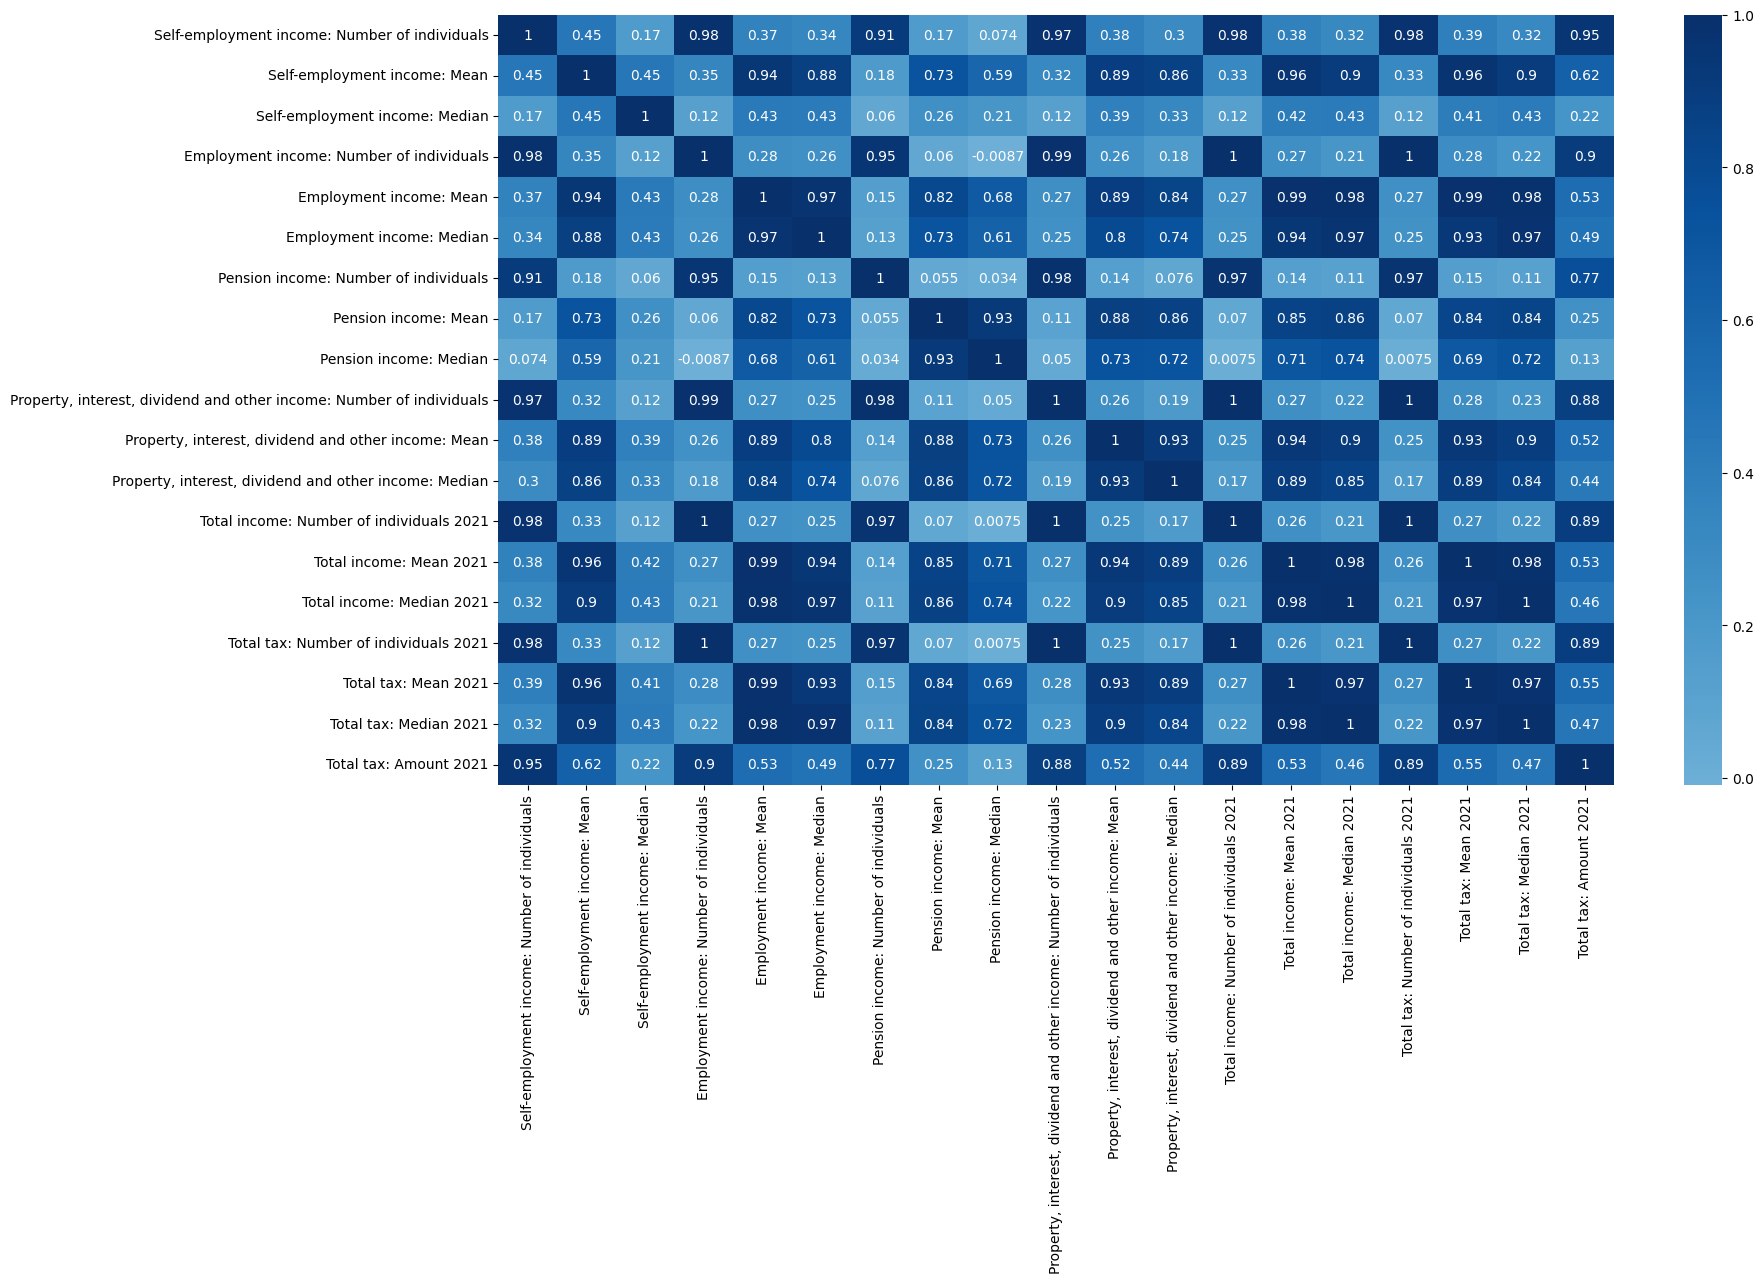

In [ ]:
# Create new dataframe with relevant columns
corr_df = taxd.iloc[:, 2:]

# Calculate correlation matrix
plt.figure(figsize =(18,10))
corr_matrix = corr_df.corr()

# Plot correlation matrix using heatmap
sns.heatmap(corr_matrix, cmap='Blues', center=0, annot=True)


In [ ]:
# upload cleaned data from excel after dropping uncorrelated columns
taxdata_cl = pd.read_csv('/content/drive/MyDrive/cleaned Tax Payments.csv')
taxdata_cl

,Regions,Year,Total income: Number of individuals,Total income: Mean,Total income: Median,Total tax: Number of individuals,Total tax: Mean,Total tax: Median,Total tax: Amount,Unnamed: 9
0,North East,2021,"1,170","30,600","24,300","1,170","3,870","2,120","4,530",NaN
1,North West,2021,"3,340","32,600","25,000","3,340","4,550","2,250","15,200",NaN
2,Yorkshire and the Humber,2021,"2,460","31,500","24,500","2,460","4,200","2,160","10,300",NaN
3,East Midlands,2021,"2,310","32,200","24,800","2,310","4,390","2,200","10,100",NaN
4,West Midlands,2021,"2,610","32,200","24,700","2,610","4,420","2,200","11,600",NaN
5,East of England,2021,"3,110","38,600","27,500","3,110","6,540","2,650","20,400",NaN
6,London,2021,"4,180","54,200","31,500","4,180","12,300","3,390","51,600",NaN
7,South East,2021,"4,670","42,000","28,600","4,670","7,720","2,820","36,000",NaN
8,South West,2021,"2,790","33,700","25,500","2,790","4,820","2,310","13,400",NaN
9,North East,2020,"1,140","30,000","23,800","1,140","3,750","2,030","4,270",NaN


In [ ]:
# drop the least correlated and irrelevant columns for the modeling
taxdata_cl.drop (['Total tax: Median', 'Total tax: Mean', 'Total income: Mean', 'Total income: Median', 'Total income: Number of individuals',], axis = 1, inplace = True)

In [ ]:
# drop the columns with NaN values
taxdata_cl.drop (['Unnamed: 9'], axis = 1, inplace = True)

In [ ]:
# view cleaned and merged tax dataset from excel
taxdata_cl

,Regions,Year,Total tax: Number of individuals,Total tax: Amount
0,North East,2021,"1,170","4,530"
1,North West,2021,"3,340","15,200"
2,Yorkshire and the Humber,2021,"2,460","10,300"
3,East Midlands,2021,"2,310","10,100"
4,West Midlands,2021,"2,610","11,600"
5,East of England,2021,"3,110","20,400"
6,London,2021,"4,180","51,600"
7,South East,2021,"4,670","36,000"
8,South West,2021,"2,790","13,400"
9,North East,2020,"1,140","4,270"


In [ ]:
# rename Totaltax : Number of individuals
taxdata_cl = taxdata_cl.rename(columns = {'Total tax: Number of individuals' : 'Population of Individuals'})

In [ ]:
taxdata_cl

,Regions,Year,Population of Individuals,Total tax: Amount
0,North East,2021,"1,170","4,530"
1,North West,2021,"3,340","15,200"
2,Yorkshire and the Humber,2021,"2,460","10,300"
3,East Midlands,2021,"2,310","10,100"
4,West Midlands,2021,"2,610","11,600"
5,East of England,2021,"3,110","20,400"
6,London,2021,"4,180","51,600"
7,South East,2021,"4,670","36,000"
8,South West,2021,"2,790","13,400"
9,North East,2020,"1,140","4,270"


In [ ]:
cols_to_convert = ['Population of Individuals', 
                   'Total tax: Amount']
# replace commas with empty string in the listed columns
for col in cols_to_convert:
  taxdata_cl[col] = taxdata_cl[col].str.replace(',', '')
  # convert column B from object to int64
  taxdata_cl[col] = taxdata_cl[col].astype('int64')

# print the updated DataFrame
taxdata_cl

,Regions,Year,Population of Individuals,Total tax: Amount
0,North East,2021,1170,4530
1,North West,2021,3340,15200
2,Yorkshire and the Humber,2021,2460,10300
3,East Midlands,2021,2310,10100
4,West Midlands,2021,2610,11600
5,East of England,2021,3110,20400
6,London,2021,4180,51600
7,South East,2021,4670,36000
8,South West,2021,2790,13400
9,North East,2020,1140,4270


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

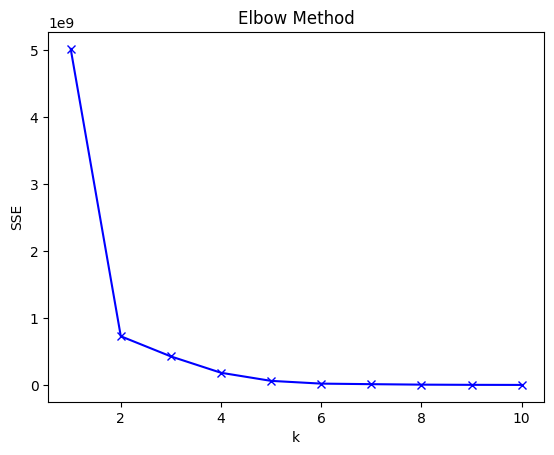

In [ ]:
# Choose the two columns for clustering
X = taxdata_cl[['Population of Individuals', 'Total tax: Amount']]

# try different values of k
K = range(1, 11)
sse = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# plot the SSE for each value of k
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


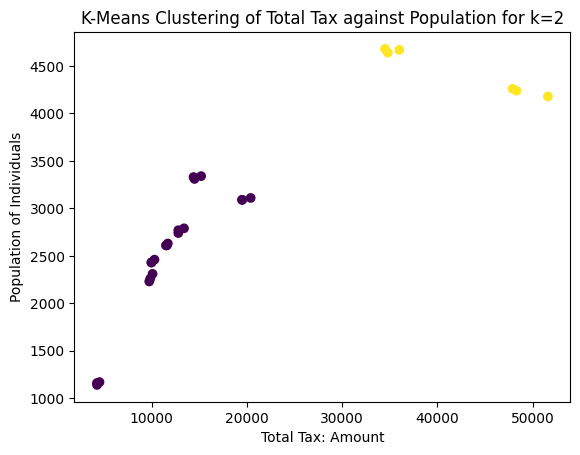

The average silhouette score is: 0.7920926546767868


In [ ]:
# Choose the two columns for clustering
X = taxdata_cl[['Total tax: Amount','Population of Individuals']]

# Define the number of clusters
k = 2

# Create the k-means clustering object
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the k-means model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
taxdata_cl['Cluster'] = labels
centroids = kmeans.cluster_centers_

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(X, labels)

# Plot the clusters
plt.scatter(taxdata_cl['Total tax: Amount'], taxdata_cl['Population of Individuals'], c=labels)
plt.xlabel('Total Tax: Amount')
plt.ylabel('Population of Individuals')
plt.title('K-Means Clustering of Total Tax against Population for k=2')
plt.show()
# Print the silhouette score
print('The average silhouette score is:', silhouette_avg)

In [ ]:
# upload cleaned data of homelessness from excel after dropping the least correlated and irrelevant columns
homeless = pd.read_csv('/content/drive/MyDrive/Homelessness cleaned.csv')
homeless

,Regions,Year,Number of households\n in area4 (000s),Households assessed as threatened with homelessness\nper (000s),Households assessed as homeless\nper (000s),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,North East,2021,1182185,6073.499495,6428.773838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,North West,2021,3178357,4942.805355,7047.666452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yorkshire and The Humber,2021,2343742,5755.752980,5725.886211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,East Midlands,2021,2054965,4540.223313,5333.424170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,West Midlands,2021,2458616,3599.586109,6820.910626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,East of England,2021,2612836,4562.092684,5779.161034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,London,2021,3563452,6735.042313,7913.674718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,South East,2021,3830091,4561.249328,5383.684095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,South West,2021,2464648,4840.447804,6329.504254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,North East,2020,1177161,7169.792407,6813.001790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop the nan columns
homeless.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis = 1, inplace = True)

In [ ]:
homeless

,Regions,Year,Number of households\n in area4 (000s),Households assessed as threatened with homelessness\nper (000s),Households assessed as homeless\nper (000s)
0,North East,2021,1182185,6073.499495,6428.773838
1,North West,2021,3178357,4942.805355,7047.666452
2,Yorkshire and The Humber,2021,2343742,5755.752980,5725.886211
3,East Midlands,2021,2054965,4540.223313,5333.424170
4,West Midlands,2021,2458616,3599.586109,6820.910626
5,East of England,2021,2612836,4562.092684,5779.161034
6,London,2021,3563452,6735.042313,7913.674718
7,South East,2021,3830091,4561.249328,5383.684095
8,South West,2021,2464648,4840.447804,6329.504254
9,North East,2020,1177161,7169.792407,6813.001790


In [ ]:
# drop the column irrelevant for modeling
homeless.drop (['Households assessed as threatened with homelessness\nper (000s)'], axis = 1, inplace = True)

In [ ]:
homeless

,Regions,Year,Number of households\n in area4 (000s),Households assessed as homeless\nper (000s)
0,North East,2021,1182185,6428.773838
1,North West,2021,3178357,7047.666452
2,Yorkshire and The Humber,2021,2343742,5725.886211
3,East Midlands,2021,2054965,5333.424170
4,West Midlands,2021,2458616,6820.910626
5,East of England,2021,2612836,5779.161034
6,London,2021,3563452,7913.674718
7,South East,2021,3830091,5383.684095
8,South West,2021,2464648,6329.504254
9,North East,2020,1177161,6813.001790


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

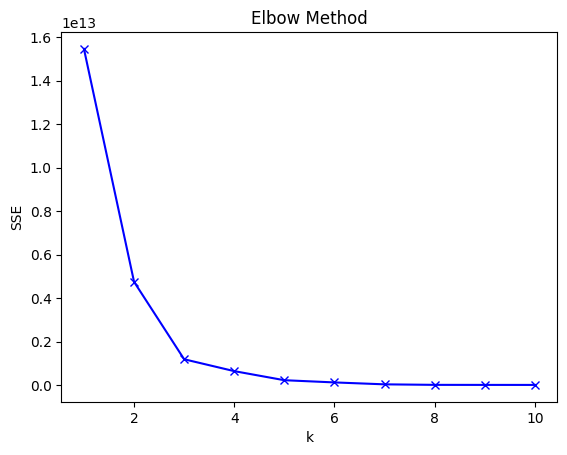

In [ ]:
# Choose the two columns for clustering
X = homeless[['Number of households\n in area4 (000s)', 'Households assessed as homeless\nper (000s)']]

# try different values of k
K = range(1, 11)
sse = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# plot the SSE for each value of k
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


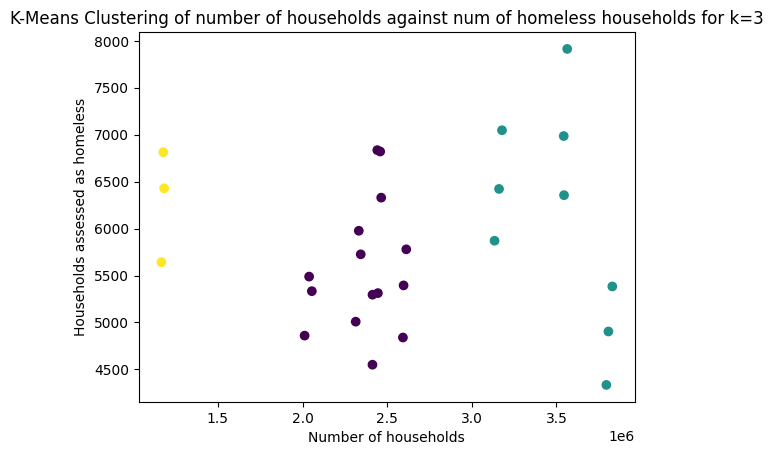

The average silhouette score is: 0.7663835905406673


In [ ]:
# Choose the two columns for clustering
X = homeless[['Number of households\n in area4 (000s)', 'Households assessed as homeless\nper (000s)']]

# Define the number of clusters
k = 3

# Create the k-means clustering object
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the k-means model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
homeless['Cluster'] = labels
centroids = kmeans.cluster_centers_

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(X, labels)

# Plot the clusters
plt.scatter(homeless['Number of households\n in area4 (000s)'], homeless['Households assessed as homeless\nper (000s)'], c=labels)
plt.xlabel('Number of households')
plt.ylabel('Households assessed as homeless')
plt.title('K-Means Clustering of number of households against num of homeless households for k=3')
plt.show()

# Print the silhouette score
print('The average silhouette score is:', silhouette_avg)

In [ ]:
# upload merged homeless data from excel
tax_homeless = pd.read_csv('/content/drive/MyDrive/tax_homeless.csv')
tax_homeless

,Regions,Year,Total income: Number of individuals (000s),"Total tax: Amount(000,000s)",Number of households\n in area4 (000s),Households assessed as homeless\nper (000s)
0,North East,2021,"1,170","4,530",1182185,6428.773838
1,North West,2021,"3,340","15,200",3178357,7047.666452
2,Yorkshire and the Humber,2021,"2,460","10,300",2343742,5725.886211
3,East Midlands,2021,"2,310","10,100",2054965,5333.424170
4,West Midlands,2021,"2,610","11,600",2458616,6820.910626
5,East of England,2021,"3,110","20,400",2612836,5779.161034
6,London,2021,"4,180","51,600",3563452,7913.674718
7,South East,2021,"4,670","36,000",3830091,5383.684095
8,South West,2021,"2,790","13,400",2464648,6329.504254
9,North East,2020,"1,140","4,270",1177161,6813.001790


In [ ]:
# merge taxdata and homeless data without increasing the rows
tax_homelessness = pd.merge(taxdata_cl, homeless, left_index=True, right_index=True)

# print the merged dataframe
tax_homelessness

,Regions_x,Year_x,Population of Individuals,Total tax: Amount,Cluster_x,Regions_y,Year_y,Number of households\n in area4 (000s),Households assessed as homeless\nper (000s),Cluster_y
0,North East,2021,1170,4530,0,North East,2021,1182185,6428.773838,2
1,North West,2021,3340,15200,0,North West,2021,3178357,7047.666452,1
2,Yorkshire and the Humber,2021,2460,10300,0,Yorkshire and The Humber,2021,2343742,5725.886211,0
3,East Midlands,2021,2310,10100,0,East Midlands,2021,2054965,5333.424170,0
4,West Midlands,2021,2610,11600,0,West Midlands,2021,2458616,6820.910626,0
5,East of England,2021,3110,20400,0,East of England,2021,2612836,5779.161034,0
6,London,2021,4180,51600,1,London,2021,3563452,7913.674718,1
7,South East,2021,4670,36000,1,South East,2021,3830091,5383.684095,1
8,South West,2021,2790,13400,0,South West,2021,2464648,6329.504254,0
9,North East,2020,1140,4270,0,North East,2020,1177161,6813.001790,2


In [ ]:
tax_homelessness = tax_homelessness.drop(columns=['Year_y', 'Cluster_x', 'Cluster_y', 'Regions_y'])
tax_homelessness

,Regions_x,Year_x,Population of Individuals,Total tax: Amount,Number of households\n in area4 (000s),Households assessed as homeless\nper (000s)
0,North East,2021,1170,4530,1182185,6428.773838
1,North West,2021,3340,15200,3178357,7047.666452
2,Yorkshire and the Humber,2021,2460,10300,2343742,5725.886211
3,East Midlands,2021,2310,10100,2054965,5333.424170
4,West Midlands,2021,2610,11600,2458616,6820.910626
5,East of England,2021,3110,20400,2612836,5779.161034
6,London,2021,4180,51600,3563452,7913.674718
7,South East,2021,4670,36000,3830091,5383.684095
8,South West,2021,2790,13400,2464648,6329.504254
9,North East,2020,1140,4270,1177161,6813.001790


In [ ]:
# rename the merged columns
tax_homelessness = tax_homelessness.rename(columns={'Regions_x': 'Regions', 'Year_x': 'Year', 'Number of households\n in area4 (000s)': 'Population of Households(000s)', 'Population of Individuals': 'Population of Individuals (000s)', 'Total tax: Amount': 'Total tax: Amount(000,000)', 'Households assessed as homeless\nper (000s)': 'Households assessed as homeless (000s)'})
tax_homelessness

,Regions,Year,Population of Individuals (000s),"Total tax: Amount(000,000)",Population of Households(000s),Households assessed as homeless (000s)
0,North East,2021,1170,4530,1182185,6428.773838
1,North West,2021,3340,15200,3178357,7047.666452
2,Yorkshire and the Humber,2021,2460,10300,2343742,5725.886211
3,East Midlands,2021,2310,10100,2054965,5333.424170
4,West Midlands,2021,2610,11600,2458616,6820.910626
5,East of England,2021,3110,20400,2612836,5779.161034
6,London,2021,4180,51600,3563452,7913.674718
7,South East,2021,4670,36000,3830091,5383.684095
8,South West,2021,2790,13400,2464648,6329.504254
9,North East,2020,1140,4270,1177161,6813.001790


In [ ]:
tax_homelessness = tax_homelessness.rename(columns={'Year_x': 'Year'})
tax_homelessness

,Regions,Year,Population of Individuals (000s),"Total tax: Amount(000,000)",Population of Households(000s),Households assessed as homeless (000s)
0,North East,2021,1170,4530,1182185,6428.773838
1,North West,2021,3340,15200,3178357,7047.666452
2,Yorkshire and the Humber,2021,2460,10300,2343742,5725.886211
3,East Midlands,2021,2310,10100,2054965,5333.424170
4,West Midlands,2021,2610,11600,2458616,6820.910626
5,East of England,2021,3110,20400,2612836,5779.161034
6,London,2021,4180,51600,3563452,7913.674718
7,South East,2021,4670,36000,3830091,5383.684095
8,South West,2021,2790,13400,2464648,6329.504254
9,North East,2020,1140,4270,1177161,6813.001790


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

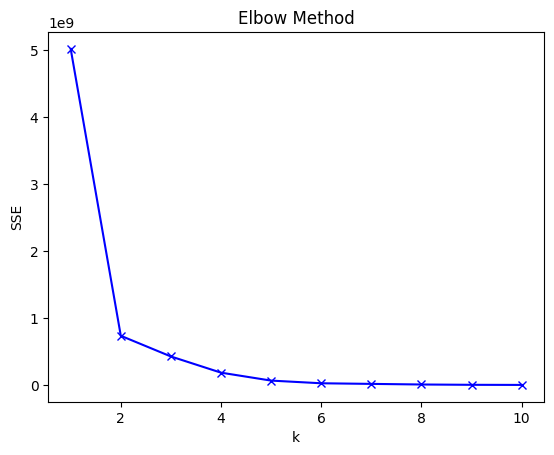

In [ ]:
# Choose the two columns for clustering
X = tax_homelessness[['Households assessed as homeless (000s)', 'Total tax: Amount(000,000)']]

# try different values of k
K = range(1, 11)
sse = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# plot the SSE for each value of k
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


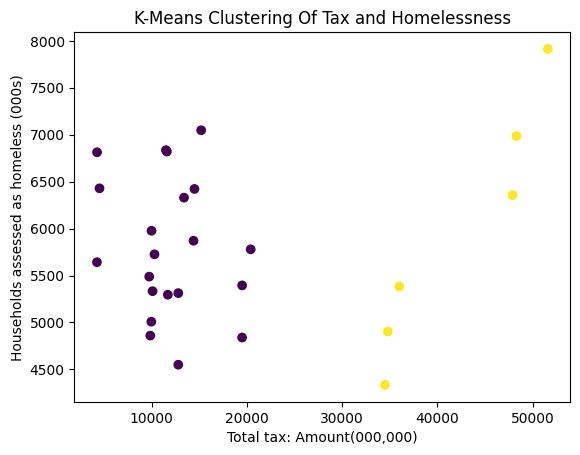

The average silhouette score is: 0.7865208114810289


In [ ]:
# Choose the two columns for clustering of tax against homelessness
X = tax_homelessness[['Households assessed as homeless (000s)', 'Total tax: Amount(000,000)']]

# Define the number of clusters
k = 2

# Create the k-means clustering object
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the k-means model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
tax_homelessness['Cluster'] = labels

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(X, labels)

# Plot the clusters
plt.scatter(tax_homelessness['Total tax: Amount(000,000)'], tax_homelessness['Households assessed as homeless (000s)'], c=labels)
plt.xlabel('Total tax: Amount(000,000)')
plt.ylabel('Households assessed as homeless (000s)')
plt.title('K-Means Clustering Of Tax and Homelessness')
plt.show()

# Print the silhouette score
print('The average silhouette score is:', silhouette_avg)

In [ ]:
# create two separate datasets based on Total tax: Amount column
high_tax = tax_homelessness[tax_homelessness['Total tax: Amount(000,000)'] > 30000]
low_tax = tax_homelessness[tax_homelessness['Total tax: Amount(000,000)'] <= 30000]

# print number of rows in each dataset
print("Number of rows in high_tax dataset: ", len(high_tax))
print("Number of rows in low_tax dataset: ", len(low_tax))


Number of rows in high_tax dataset:  6
Number of rows in low_tax dataset:  21


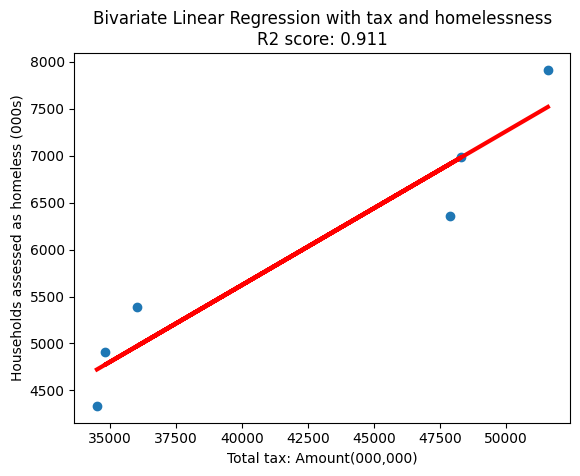

In [ ]:
# extract the two variables of interest
tax = high_tax['Total tax: Amount(000,000)']
homeless = high_tax['Households assessed as homeless (000s)']

# convert to NumPy arrays and reshape into column vectors
X = tax.values.reshape(-1, 1)
y = homeless.values.reshape(-1, 1)

# fit linear regression model
regr = LinearRegression()
regr.fit(X, y)

# predict values using the fitted model
y_pred = regr.predict(X)

# calculate R2 score
r2 = regr.score(X, y)

# plot the data and fitted line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=3)
plt.title(f'Bivariate Linear Regression with tax and homelessness\nR2 score: {r2:.3f}')
plt.xlabel('Total tax: Amount(000,000)')
plt.ylabel('Households assessed as homeless (000s)')
plt.show()


In [ ]:
# multivariate linear regression of tax and homeless
X = low_tax[['Households assessed as homeless (000s)', 'Population of Individuals (000s)']]
y = low_tax['Total tax: Amount(000,000)']

# fit a linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Generate predictions
y_pred = regr.predict(X)

# Calculate R2 score
r2 = r2_score(y, y_pred)

# Create a 3D scatter plot of the originl data
fig = px.scatter_3d(x=X['Households assessed as homeless (000s)'], y=X['Population of Individuals (000s)'], z=y,
                    #color=y, color_continous_scale='Viridis',
                    labels={'x': 'Households assessed as homeless (000s)', 'y': 'Population of Individuals (000s)', 'z': 'Total tax: Amount(000,000))'}) 

# Add a 3D surface plot of the regression plane
x_surf, y_surf = np.meshgrid(np.linspace(X['Households assessed as homeless (000s)'].min(), X['Households assessed as homeless (000s)'].max(), 10),
                             np.linspace(X['Population of Individuals (000s)'].min(), X['Population of Individuals (000s)'].max(), 10))
z_surf = regr.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
z_surf = z_surf.reshape(x_surf.shape)
fig.add_trace(go.Surface(x=x_surf, y=y_surf, z=z_surf,
                         #colorscale='Blues',
                         opacity=0.5))

fig.update_layout(title='Multivariate Linear Regression with Tax and Homelessness Data',
                  scene={'xaxis_title': 'HOMELESS',
                         'yaxis_title': 'Population',
                         'zaxis_title': 'Target (Total Tax)'},
                  width=800, height=600)
fig.show()
print("R2 score:", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



R2 score: 0.8094206141929785
